In [979]:
#!/usr/bin/python
#- * -coding: utf - 8 - * -

import urllib.request
import urllib.parse
import urllib.error
from bs4 import BeautifulSoup
import ssl
import json
import string
import ast
import os
from urllib.request import Request, urlopen

# For ignoring SSL certificate errors

import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
# import seaborn
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import nltk
# from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import LatentDirichletAllocation

In [35]:
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

# Input from user
url = 'https://genius.com/artists/Kanye-West'

# Making the website believe that you are accessing it using a mozilla browser
req = Request(url, headers = { 'User-Agent' : 'Mozilla/5.0' })
webpage = urlopen(req).read()

# Creating a BeautifulSoup object of the html page for easy extraction of data.

soup = BeautifulSoup(webpage, 'html.parser')
html = soup.prettify('utf-8')
song_json = {}
song_json["Lyrics"] = [];
song_json["Comments"] = [];


In [119]:
def get_artists_given_first_letter(letter):
    artists_list = []
    ctx = ssl.create_default_context()
    ctx.check_hostname = False
    ctx.verify_mode = ssl.CERT_NONE

    # Input from user
    url = "https://genius.com/artists-index/{}".format(letter)
    # Making the website believe that you are accessing it using a mozilla browser
    req = Request(url, headers = { 'User-Agent' : 'Mozilla/5.0' })
    webpage = urlopen(req).read()

    # Creating a BeautifulSoup object of the html page for easy extraction of data.

    soup = BeautifulSoup(webpage, 'html.parser')
    html = soup.prettify('utf-8')
    
    artists_list = []
    # gets popular artists under first_name starting with letter
    for artist_span in soup.findAll('li', attrs = {'class': 'artists_index_list-popular_artist'}):
        artists_list.append(artist_span.find_all('a', attrs={'class': 'artists_index_list-artist_name'})[0].text)
    # gets general artists under first_name starting with letter
    for artist_span in soup.findAll('ul', attrs = {'class': 'artists_index_list'})[1].find_all('li'):
        artists_list.append(artist_span.text.strip())
    return artists_list

In [43]:
def get_popular_songs_from_genius(artist):
    artist_str = '-'.join(artist.split(' '))
    ctx = ssl.create_default_context()
    ctx.check_hostname = False
    ctx.verify_mode = ssl.CERT_NONE

    # Input from user
    url = "https://genius.com/artists/{}".format(artist_str)

    # Making the website believe that you are accessing it using a mozilla browser
    req = Request(url, headers = { 'User-Agent' : 'Mozilla/5.0' })
    webpage = urlopen(req).read()

    # Creating a BeautifulSoup object of the html page for easy extraction of data.

    soup = BeautifulSoup(webpage, 'html.parser')
    html = soup.prettify('utf-8')
    song_json = {}
    song_json["Lyrics"] = [];
    song_json["Comments"] = [];

    return [i.text.strip() for i in soup.findAll('div',attrs = {'class': 'mini_card-title'})]

In [125]:
all_artists_list = []
for l in list(string.ascii_lowercase):
    all_artists_list.extend(get_artists_given_first_letter(l))

In [127]:
len(all_artists_list)

17822

In [150]:
filtered_artists = list(filter(lambda x: all(ord(char) < 128 for char in x), all_artists_list))

### Collect dictionary of {'artist': list(popular_songs)}

In [168]:
for i in range(2,int(np.ceil(len(filtered_artists)/100))):
    artist_to_popular_songs = dict()
    start_idx, end_idx = i*100, i*100+100
    curr_artists = filtered_artists[start_idx: end_idx]
    for idx, a in enumerate(curr_artists):
        print(idx)
        try: 
            if all(ord(char) < 128 for char in a):
                artist_to_popular_songs[a] = get_popular_songs_from_genius(a)
            else: 
                print("non-ascii character in artist-name: {}".format(a))
        except Exception: 
            print("Error with artist {}".format(a))
    with open("artist_to_popular_songs_{}.pkl".format(i), 'wb') as file: 
        print("Saving artists {} to {}".format(start_idx, end_idx))
        pickle.dump(artist_to_popular_songs, file)

0
1
Error with artist Albert Hammond Jr.
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Saving artists 200 to 300
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
Error with artist Andrew E.
95
96
97
98
99
Saving artists 300 to 400
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Saving artist

57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Saving artists 2300 to 2400
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
Error with artist Dinosaur Jr.
97
98
99
Saving artists 2400 to 2500
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Saving artists 2500 to 2600
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
Error with artist Dope D.O.D.
48
49
50
51


73
74
Error with artist The G.O.A.T. And Your M.O.M.
75
Error with artist G.O.A.T. (Jack Maynard and Conor Maynard)
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
Error with artist The Go-Go's
93
94
95
96
97
98
99
Saving artists 4500 to 4600
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
Error with artist The Good, The Bad and The Queen
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
Error with artist A Great Big World & Christina Aguilera
94
95
96
97
98
99
Saving artists 4600 to 4700
0
Error with artist The Green (band)
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
Error with artist G.R.L.
57
58
59
60
61
62
63
64
65
66
67
68
69
70
Error with artist Grover Washington Jr.
71
72
73
74
75
76
77
78
79

63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Saving artists 6600 to 6700
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
Error with artist Joker/Two-Face
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
Error with artist Jon Z & Baby Rasta
77
Error with artist Jon Z & Ele A El Dominio
78
Error with artist Jon Z, Rick Ross & Miky Woodz
79
Error with artist Jon Z, Wisin & Chencho Corleone
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Saving artists 6700 to 6800
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
Error with artist J. R. R. Tolkien
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Saving 

1
2
3
4
5
6
7
8
9
10
Error with artist M.O.P.
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
Error with artist Motive (M.O.B)
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Error with artist M.Y.M.P.
Saving artists 8900 to 9000
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
Error with artist The Notorious B.I.G.
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
Error with artist N.A.N.A
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Saving artists 9000 to 9100
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
7

82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Saving artists 10900 to 11000
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
Error with artist Public Image Ltd.
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Saving artists 11000 to 11100
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
Error with artist Q / Q Anon / Q Clearance Patriot
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Saving artists 11100 to 11200
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
Error with artist The Quiett, Sik-K, Beenzino, CHANGMO
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47


88
89
90
91
92
93
94
95
96
97
98
99
Saving artists 13100 to 13200
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
Error with artist T.R.I & Cammie
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
Error with artist TR/ST
59
60
61
62
63
64
65
66
67
Error with artist T.S. Eliot
68
69
70
Error with artist T.S.O.L
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Saving artists 13200 to 13300
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
Error with artist U. A. Fanthorpe
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
Error with artist U.D.O.
93
94
Error with artist U.D.R
95
96
97
Error with artist U.F.B.
98
99
Saving artists 13300 to 13400
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
Error with artist Uji

71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Saving artists 15100 to 15200
0
1
2
3
4
5
6
Error with artist X.E.X
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
Error with artist X-Raided  (a.k.a. Nefarious)
49
50
51
52
53
54
55
56
57
58
59
Error with artist X.T.P. (GR)
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
Error with artist XX/\/\E
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
Error with artist XXXTENTACION ft. Lil Vo, PnB Rock
90
91
92
93
94
95
96
97
98
99
Saving artists 15200 to 15300
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Saving artists 15300 to 15400
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24

In [148]:
# store artist to popular songs as a pickle file
with open('artist_to_popular_songs.pkl', 'wb') as file: 
    pickle.dump(artist_to_popular_songs, file)

### Read and combine artist to popular song dictionary across all artists

In [185]:
files = [i for i in os.listdir('.') if i.startswith('artist_to_popular_songs_')]
all_artists_to_songs = dict()
for f in files: 
    with open(f, 'rb') as file:
        curr_json = pickle.load(file)
        all_artists_to_songs.update(curr_json)

with open('all_artist_to_popular_songs.pkl', 'wb') as file:
    pickle.dumps(all_artists_to_songs)

### Create DataFrame to store artists and songs from genius.com popular songs for all artists indexed on the site

In [196]:
artist = all_artists_to_songs.keys()
songs = all_artists_to_songs.values()

In [203]:
music = pd.DataFrame({'artist': list(artist), 'songs':  list(songs)})

In [206]:
music = music.explode('songs')

In [208]:
music.to_csv("artists_songs.csv", index=False)

### Get Top 100 Songs on Billboard from: 1) Pop; 2) Hip Hop/R&B

In [ ]:
def get_artists_given_first_letter(letter):
    artists_list = []
    ctx = ssl.create_default_context()
    ctx.check_hostname = False
    ctx.verify_mode = ssl.CERT_NONE

    # Input from user
    url = "https://genius.com/artists-index/{}".format(letter)
    # Making the website believe that you are accessing it using a mozilla browser
    req = Request(url, headers = { 'User-Agent' : 'Mozilla/5.0' })
    webpage = urlopen(req).read()

    # Creating a BeautifulSoup object of the html page for easy extraction of data.

    soup = BeautifulSoup(webpage, 'html.parser')
    html = soup.prettify('utf-8')
    
    artists_list = []
    # gets popular artists under first_name starting with letter
    for artist_span in soup.findAll('li', attrs = {'class': 'artists_index_list-popular_artist'}):
        artists_list.append(e)
    # gets general artists under first_name starting with letter
    for artist_span in soup.findAll('ul', attrs = {'class': 'artists_index_list'})[1].find_all('li'):
        artists_list.append(artist_span.text.strip())
    return artists_list

In [246]:
def collect_top_billboard_artists(url):
    artists_list = []
    ctx = ssl.create_default_context()
    ctx.check_hostname = False
    ctx.verify_mode = ssl.CERT_NONE

    # Input from user
    
    # Making the website believe that you are accessing it using a mozilla browser
    req = Request(url, headers = { 'User-Agent' : 'Mozilla/5.0' })
    webpage = urlopen(req).read()

    # Creating a BeautifulSoup object of the html page for easy extraction of data.

    soup = BeautifulSoup(webpage, 'html.parser')
    html = soup.prettify('utf-8')

    top_artists =  [i.text.replace('\n','') for i in soup.findAll('div', attrs = {'class': 'ye-chart-item__title'})]
    return [i.lower() for i in top_artists]

In [247]:
top_100_hip_rb_artists = collect_top_billboard_artists(url = "https://www.billboard.com/charts/year-end/top-r-and-b-hip-hop-artists")
top_100_pop_artists = collect_top_billboard_artists(url = "https://www.billboard.com/charts/year-end/pop-songs-artists")
top_100_country_artists = collect_top_billboard_artists(url = "https://www.billboard.com/charts/year-end/top-country-artists")
top_100_rock_artists = collect_top_billboard_artists(url = "https://www.billboard.com/charts/year-end/top-rock-artists")

### Label song genre for known artists

In [250]:
music['artist'] = [i.lower() for i in list(music.artist)]

In [255]:
music['genre'] = None
music.loc[music.artist.isin(top_100_country_artists),'genre'] = 'Country'
music.loc[music.artist.isin(top_100_country_artists),'genre'] = 'Hip Hop/R&B'
music.loc[music.artist.isin(top_100_rock_artists),'genre'] = 'Rock'
music.loc[music.artist.isin(top_100_pop_artists),'genre'] = 'Pop'

In [390]:
top_artist = music[pd.notnull(music.genre)]

In [391]:
top_artist.reset_index(inplace=True)

In [392]:
def get_genius_song_url(artist_name, song_name):
    song_name = song_name.replace(',', '').replace('\'', '').replace('.', '').replace('(', '').replace(')', '').replace('!','').replace('&','').replace('+', '').replace('?', '')
    base_url = "https://genius.com/"
    suffix = 'lyrics'
    artist_part = '-'.join(artist_name.split(' '))
    song_part = '-'.join(song_name.split(' '))
    return base_url + artist_part + '-' + song_part + '-' + suffix

In [393]:
get_genius_song_url(top_artist.artist[0], top_artist.songs[0])

'https://genius.com/zac-brown-band-Toes-lyrics'

In [394]:
get_genius_song_url('Beyonce', 'drunk in love')

'https://genius.com/Beyonce-drunk-in-love-lyrics'

In [395]:
top_artist['lyrics'] = None

/Users/lancemack/analyzing_music/env3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [397]:
#!/usr/bin/python
#- * -coding: utf - 8 - * -

import urllib.request
import urllib.parse
import urllib.error
from bs4 import BeautifulSoup
import ssl
import json
import ast
import os
from urllib.request import Request, urlopen

for artist, song in zip(top_artist.artist, top_artist.songs):
    # For ignoring SSL certificate errors
    print("Artist: {}; Song: {}".format(artist, song))
    try:
        ctx = ssl.create_default_context()
        ctx.check_hostname = False
        ctx.verify_mode = ssl.CERT_NONE

        # Input from user
        url = get_genius_song_url(artist, song)

        # Making the website believe that you are accessing it using a mozilla browser
        req = Request(url, headers = { 'User-Agent' : 'Mozilla/5.0' })
        webpage = urlopen(req).read()

        # Creating a BeautifulSoup object of the html page for easy extraction of data.

        soup = BeautifulSoup(webpage, 'html.parser')
        html = soup.prettify('utf-8')
        song_json = {}
        song_json["Lyrics"] = [];
        song_json["Comments"] = [];

        #Extract Title of the song
        for title in soup.findAll('title'):
          song_json["Title"] = title.text.strip()

        # Extract the release date of the song
        for span in soup.findAll('span', attrs = {'class': 'metadata_unit-info metadata_unit-info--text_only'}):
          song_json["Release date"] = span.text.strip()

        # Extract the Comments on the song
        for div in soup.findAll('div', attrs = {'class': 'rich_text_formatting'}):
          comments = div.text.strip().split("\n")
          for comment in comments:
              if comment!="":
                  song_json["Comments"].append(comment);

        #Extract the Lyrics of the song
        for div in soup.findAll('div', attrs = {'class': 'lyrics'}):
          song_json["Lyrics"].append(div.text.strip().split("\n"));

        #Save the json created with the file name as title + .json
        with open(song_json["Title"] + '.json', 'w') as outfile:
          json.dump(song_json, outfile, indent = 4, ensure_ascii = False)

        # Save the html content into an html file with name as title + .html
        with open(song_json["Title"] + '.html', 'wb') as file:
          file.write(html)

        top_artist.loc[(top_artist.artist==artist)&(top_artist.songs==song),'lyrics'] = (' ').join(song_json['Lyrics'][0])
    except Exception:
        print("Failed in Error")

Artist: zac brown band; Song: Toes
Artist: zac brown band; Song: Colder Weather
Artist: zac brown band; Song: Chicken Fried
Artist: zac brown band; Song: Knee Deep
Artist: zac brown band; Song: Homegrown
Artist: zac brown band; Song: Someone I Used to Know
Artist: zac brown band; Song: Beautiful Drug
Artist: zac brown band; Song: All the Best
Artist: zac brown band; Song: My Old Man
Artist: zac brown band; Song: Bittersweet
Artist: disturbed; Song: The Sound of Silence
Artist: disturbed; Song: Down with the Sickness
Artist: disturbed; Song: The Vengeful One
Artist: disturbed; Song: A Reason to Fight
Artist: disturbed; Song: Stricken
Artist: disturbed; Song: Inside the Fire
Artist: disturbed; Song: The Light
Artist: disturbed; Song: Indestructible
Artist: disturbed; Song: Immortalized
Artist: disturbed; Song: Stupify
Artist: cole swindell; Song: Break Up in the End
Artist: cole swindell; Song: You Should Be Here
Artist: cole swindell; Song: Dad's Old Number
Artist: cole swindell; Song: 

Artist: greta van fleet; Song: Talk On the Street
Artist: greta van fleet; Song: Age of Man
Artist: greta van fleet; Song: Anthem
Artist: greta van fleet; Song: Lover, Leaver (Taker, Believer)
Artist: rascal flatts; Song: Life Is a Highway
Artist: rascal flatts; Song: What Hurts The Most
Artist: rascal flatts; Song: Bless the Broken Road
Artist: rascal flatts; Song: Forever Country
Failed in Error
Artist: rascal flatts; Song: My Wish
Artist: rascal flatts; Song: Yours If You Want It
Artist: rascal flatts; Song: Back to Life
Artist: rascal flatts; Song: Back to Us
Artist: rascal flatts; Song: Are You Happy Now
Artist: rascal flatts; Song: I Like The Sound Of That
Artist: paul mccartney; Song: All Day
Failed in Error
Artist: paul mccartney; Song: FourFiveSeconds
Failed in Error
Artist: paul mccartney; Song: Only One
Failed in Error
Artist: paul mccartney; Song: Do They Know It's Christmas?
Failed in Error
Artist: paul mccartney; Song: Those Were the Days
Failed in Error
Artist: paul mcca

Artist: pink floyd; Song: Brain Damage
Artist: pink floyd; Song: Breathe (In the Air)
Artist: pink floyd; Song: Shine On You Crazy Diamond, Pts. 1-5
Artist: pink floyd; Song: Hey You
Artist: pink floyd; Song: Us and Them
Artist: george ezra; Song: Shotgun
Artist: george ezra; Song: Budapest
Artist: george ezra; Song: Paradise
Artist: george ezra; Song: Hold My Girl
Artist: george ezra; Song: Pretty Shining People
Artist: george ezra; Song: Blame It On Me
Artist: george ezra; Song: Barcelona
Artist: george ezra; Song: Don't Matter Now
Artist: george ezra; Song: Listen to the Man
Artist: george ezra; Song: Cassy O'
Artist: riley green; Song: I Wish Grandpas Never Died
Artist: riley green; Song: There Was This Girl
Artist: riley green; Song: When She Comes Home Tonight
Artist: riley green; Song: Runnin' with an Angel
Artist: riley green; Song: Numbers on the Cars
Artist: riley green; Song: Georgia Time
Artist: riley green; Song: Outlaws Like Us
Artist: riley green; Song: Get That Man a Be

Artist: shawn mendes; Song: In My Blood
Artist: shawn mendes; Song: Lost in Japan
Artist: shawn mendes; Song: Treat You Better
Artist: shawn mendes; Song: If I Can't Have You
Artist: shawn mendes; Song: Mercy
Artist: shawn mendes; Song: Stitches
Artist: shawn mendes; Song: Youth
Artist: shawn mendes; Song: Fallin' All in You
Artist: shawn mendes; Song: Where Were You in the Morning?
Artist: slipknot; Song: Snuff
Artist: slipknot; Song: Psychosocial
Artist: slipknot; Song: Unsainted
Artist: slipknot; Song: Duality
Artist: slipknot; Song: The Devil In I
Artist: slipknot; Song: All Out Life
Artist: slipknot; Song: Nero Forte
Artist: slipknot; Song: Solway Firth
Artist: slipknot; Song: Wait and Bleed
Artist: slipknot; Song: Killpop
Artist: ariana grande; Song: ​thank u, next
Failed in Error
Artist: ariana grande; Song: 7 rings
Artist: ariana grande; Song: ​God is a woman
Failed in Error
Artist: ariana grande; Song: Side To Side
Artist: ariana grande; Song: ​​no tears left to cry
Failed in 

Artist: jake owen; Song: I Was Jack (You Were Diane)
Artist: jake owen; Song: Good Company
Artist: jake owen; Song: Beachin'
Artist: jake owen; Song: Real Life
Artist: jake owen; Song: Barefoot Blue Jean Night
Artist: jake owen; Song: Anywhere With You
Artist: jake owen; Song: American Country Love Song
Artist: jake owen; Song: Back Home
Failed in Error
Artist: jason aldean; Song: You Make It Easy
Artist: jason aldean; Song: Big Green Tractor
Artist: jason aldean; Song: Dirt Road Anthem
Artist: jason aldean; Song: Forever Country
Failed in Error
Artist: jason aldean; Song: Girl Like You
Artist: jason aldean; Song: Drowns the Whiskey
Artist: jason aldean; Song: Burnin' It Down
Artist: jason aldean; Song: Rearview Town
Artist: jason aldean; Song: Burning Bridges
Failed in Error
Artist: jason aldean; Song: Any Ol' Barstool
Artist: lee brice; Song: Boy
Artist: lee brice; Song: Rumor
Artist: lee brice; Song: Hard To Love
Artist: lee brice; Song: Violin
Failed in Error
Artist: lee brice; Son

Artist: chris lane; Song: I Don't Know About You
Artist: chris lane; Song: Take Back Home Girl
Artist: chris lane; Song: Big, Big Plans
Artist: chris lane; Song: For Her
Artist: chris lane; Song: All About You
Artist: chris lane; Song: Fix
Artist: chris lane; Song: Let Me Love You
Artist: chris lane; Song: Maybe
Artist: chris lane; Song: Back To Me
Artist: chris lane; Song: The Stopper
Failed in Error
Artist: chris stapleton; Song: Say Something
Failed in Error
Artist: chris stapleton; Song: Tennessee Whiskey
Artist: chris stapleton; Song: Either Way
Artist: chris stapleton; Song: Fire Away
Artist: chris stapleton; Song: Broken Halos
Artist: chris stapleton; Song: Parachute
Artist: chris stapleton; Song: More of You
Artist: chris stapleton; Song: Whiskey and You
Artist: chris stapleton; Song: Nobody to Blame
Artist: chris stapleton; Song: Traveller
Artist: chris young; Song: Hangin' On
Artist: chris young; Song: I'm Comin' Over
Artist: chris young; Song: Tomorrow
Artist: chris young; S

In [870]:
soup.findAll('span', attrs = {'class': 'metadata_unit-info metadata_unit-info--text_only'})

[<span class="metadata_unit-info metadata_unit-info--text_only">Jungle City Studios (New York City); Oven Studios (New York City)</span>,
 <span class="metadata_unit-info metadata_unit-info--text_only">December 17, 2013</span>]

In [876]:
soup.findAll('span', attrs={ 'ng-class': 'metadata_with_icon-tags-primary_tag','class':"metadata_with_icon-tags-primary_tag"})

[]

In [933]:
divs = soup.find_all('routable page')

In [937]:
soup.find_all('song-metadata')

[]

In [940]:
<div class="column_layout-column_span column_layout-column_span--secondary u-top_margin column_layout-flex_column">
        <div class="column_layout-column_span-initial_content">
          <div ng-show="initial_sidebar_content_showing()" class="">


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 7)

In [946]:
tmp=soup.findAll('div', attrs={'class': 'song_body column_layout'})

In [949]:
tmp2 = tmp[0].findAll('div', attrs={'class': 'column_layout-column_span column_layout-column_span--secondary u-top_margin column_layout-flex_column'})[0]

In [955]:
tmp3= tmp2.findAll('div', attrs={'class': 'column_layout-column_span-initial_content'})[0]

In [977]:
tmp2

<div class="column_layout-column_span column_layout-column_span--secondary u-top_margin column_layout-flex_column">
<div class="column_layout-column_span-initial_content">
<div class="dfp_unit u-x_large_bottom_margin dfp_unit--in_read">
<div style="
      width: 300px;
      height: 250px;
    "></div>
</div>
<div class="annotation_label">
<h3 class="u-inline">
            About “Drunk in Love”
          </h3>
</div>
<div class="rich_text_formatting">
<p>Beyoncé brings her husband <a data-api_path="/artists/2" href="https://genius.com/artists/Jay-z" rel="noopener">Jay Z</a> aboard for their first collaboration since 2013’s <a data-api_path="/songs/180511" href="https://genius.com/Jay-z-part-ii-on-the-run-lyrics" rel="noopener">“Part II (On the Run)”</a> continuation of their first collab <a data-api_path="/songs/3231" href="https://genius.com/Jay-z-03-bonnie-and-clyde-lyrics" rel="noopener">“‘03 Bonnie &amp; Clyde”</a>.</p>
<p>“Drunk” seems to be a more sexualized continuation of their

In [974]:
tmp3.findAll('div', attrs={'ng-show': 'intial_sidebar_content_showing()'})

[]

In [935]:
<div class="song_body column_layout">
      <div class="column_layout-column_span column_layout-column_span--primary">
        <div class="song_body-lyrics">


[]

In [916]:
divs[10].find_all('span')[5]

<span class="metadata_unit-info"><a href="https://genius.com/albums/Beyonce/Beyonce">BEYONCÉ</a></span>

In [727]:
        ctx = ssl.create_default_context()
        ctx.check_hostname = False
        ctx.verify_mode = ssl.CERT_NONE

        # Input from user
        url = "https://genius.com/Beyonce-drunk-in-love-lyrics"

        # Making the website believe that you are accessing it using a mozilla browser
        req = Request(url, headers = { 'User-Agent' : 'Mozilla/5.0' })
        webpage = urlopen(req).read()

        # Creating a BeautifulSoup object of the html page for easy extraction of data.

        soup = BeautifulSoup(webpage, 'html.parser')
        html = soup.prettify('utf-8')
        song_json = {}
        song_json["Lyrics"] = [];
        song_json["Comments"] = [];

In [ ]:
<span ng-class="{'metadata_with_icon-tags-primary_tag': tag.primary}" class="metadata_with_icon-tags-primary_tag">Pop</span>

In [732]:
soup.findAll('span ng-class', attrs={'class': 'metadata_with_icon-tags-primary_tag'})

[]

In [ ]:
soup

In [ ]:
<a class="metadata_with_icon-link" ng-href="https://genius.com/tags/pop" href="https://genius.com/tags/pop"><span ng-class="{'metadata_with_icon-tags-primary_tag': tag.primary}" class="metadata_with_icon-tags-primary_tag">Pop</span></a>

In [738]:
soup.findAll('div', attrs={'class': 'metadata_with_icon_tags'})

[]

In [744]:
soup.findAll('div', attrs={'class': 'song_metadata'})

[<div class="song_metadata u-xx_large_bottom_margin"></div>]

In [746]:
soup.findAll('div', attrs={'class': 'metadata_with_icon metadata_with_icon-contributors u-clickable',
                          'ng-click': 'ctrl.showing_all_metadata = true',
                          'span': })

# <div class="metadata_with_icon-tags">
#         <!----><span ng-repeat="tag in song.tags track by tag.id">
#           <a class="metadata_with_icon-link" ng-href="https://genius.com/tags/r-b" href="https://genius.com/tags/r-b"><span ng-class="{'metadata_with_icon-tags-primary_tag': tag.primary}" class="metadata_with_icon-tags-primary_tag">R&amp;B</span></a>, 
#         </span><!----><span ng-repeat="tag in song.tags track by tag.id">
#           <a class="metadata_with_icon-link" ng-href="https://genius.com/tags/pop" href="https://genius.com/tags/pop"><span ng-class="{'metadata_with_icon-tags-primary_tag': tag.primary}" class="metadata_with_icon-tags-primary_tag">Pop</span></a>
#         </span><!---->
#       </div>

[]

In [747]:
soup.findAll('span', attrs={'class': 'metadata_with_icon-icon_wrappe'})

[]

In [ ]:
soup.findAll('div', attrs={'class': 'metadata_with_icon_tags'})

In [398]:
1+1

2

In [399]:
top_artist.to_csv("top_artists_with_song_lyrics.csv", index=False)

### Process Lyrics Data 

#### 1. Remove song metadata. ex: [Verse x], [Chorus], [Bridge]
#### 2. Remove non-alphaNumeric Characters

In [645]:
top_artist = pd.read_csv("top_artists_with_song_lyrics.csv")

In [646]:
def remove_bracketed_measures(tmp):
    start_find = ["[Chorus", "[Verse", "[Pre-Chorus", "[Bridge"]
    for s in start_find:
        while (tmp.find(s) != -1):
            firstDelPos= tmp.find(s) # get the position of [
#             chorusDelPos = tmp.find("[Chorus")
#             firstDelPos = verseDelPos if chorusDelPos==-1 else chorusDelPos if verseDelPos==-1 else verseDelPos if verseDelPos < chorusDelPos else chorusDelPos
            secondDelPos=tmp[firstDelPos:].find("]") + firstDelPos # get the position of ]
            tmp = tmp.replace(tmp[firstDelPos:secondDelPos+1], "") # replace the string between two delimiters
    return tmp

def remove_nonalphanumeric(word):
    return " ".join([re.sub('[\W_]+', '', w) for w in word.split(' ')])

In [647]:
import re

In [648]:
top_artist = top_artist[pd.notnull(top_artist.lyrics)]
top_artist['lyrics'] = top_artist['lyrics'].apply(remove_bracketed_measures)
top_artist['lyrics'] = top_artist['lyrics'].apply(remove_nonalphanumeric)
df = top_artist[pd.notnull(top_artist.lyrics)]

In [653]:
top_artist.to_csv("top_artist_songs.csv",index=False)

In [699]:
df = top_artist[pd.notnull(top_artist.lyrics)]

In [702]:
y.value_counts()

0    755
1     64
Name: genre, dtype: int64

In [782]:
df['song_length'] = [len(x.split(' ')) for x in df.lyrics]

In [802]:
import matplotlib.pyplot as plt

In [807]:
genders

array(['Hip Hop/R&B', 'Rock', 'Pop'], dtype=object)

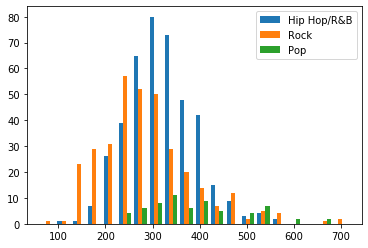

In [814]:
genders = df.genre.unique()
plt.hist([df.loc[df.genre == x, 'song_length'] for x in genders], label=genders, bins=20)
plt.legend()

### Train Simple Classifier to Predict Genre given lyrics

In [858]:
df_s = df['lyrics']
y = df['genre'].map(lambda x: 1 if x == "Rock" else 0)

In [859]:
tfidf = TfidfVectorizer(stop_words = 'english')
X = tfidf.fit_transform(df_s)

In [860]:
from scipy.sparse import hstack
X = hstack((X,np.array(df['song_length'])[:,None]))

In [861]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = LogisticRegression(random_state = 0).fit(X_train, y_train)
clf_d = DummyClassifier().fit(X_train, y_train)

/Users/lancemack/analyzing_music/env3/lib/python3.6/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [862]:
acc = clf.score(X_test, y_test)

In [863]:
acc

0.7560975609756098

In [864]:
cc_d = clf_d.score(X_test, y_test)
coef = clf.coef_.tolist()[0]
w = tfidf.get_feature_names() + ['song_length']
coeff_df = pd.DataFrame({'words' : w, 'score' : coef})
coeff_df = coeff_df.sort_values(['score', 'words'], ascending=[0, 1])
# coeff_df = coeff_df[:30]
d = coeff_df.set_index('words')['score'].to_dict()

In [865]:
w[-1]

'song_length'

In [868]:
d

{'ah': 1.1318667628648627,
 'ooh': 0.9884015076680475,
 'inside': 0.8351993317633689,
 'da': 0.7459510886838016,
 'want': 0.7362611781257962,
 'solo': 0.7037743192632581,
 'day': 0.6888552220170839,
 'bad': 0.6500259261731721,
 'oh': 0.6226706489159493,
 'die': 0.6222544993890726,
 'rise': 0.6198934382048139,
 'state': 0.6071486552351487,
 'blood': 0.6019645217315625,
 'hello': 0.5982069261974845,
 'la': 0.5877174891084168,
 'fucking': 0.5697219164940013,
 'ohoh': 0.5680866185677524,
 'man': 0.5631485181018416,
 'heavy': 0.5564356078667254,
 'fuck': 0.5530078181141315,
 'life': 0.5514969929867822,
 'dead': 0.5133536913086219,
 'standing': 0.4993249203584733,
 'run': 0.4990018622097358,
 'shit': 0.492131678617545,
 'kill': 0.4914031580948149,
 'free': 0.4906440799596518,
 'new': 0.4898397484375175,
 'alive': 0.4877341410328954,
 'refrain': 0.48343689567624243,
 'stand': 0.47227187766021417,
 'lies': 0.467192586209089,
 'far': 0.466879893802263,
 'master': 0.4659740728598957,
 'bitch': 0

## Get 100 Hip-Hop, 100 Rock, 100 Country, and 100 Pop Artists
### For each artist, use lyrics from their top 10 songs according to genius.com
### Train a classifier to predict the song's genre given its lyrics